In [34]:
import os
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets 
from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten
from matplotlib import pyplot as plt
import random

In [35]:
label_name = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def number_to_name(label_number):
    return label_name[label_number]
(X_train, Y_train) , (X_test,Y_test) = datasets.cifar10.load_data()

In [36]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

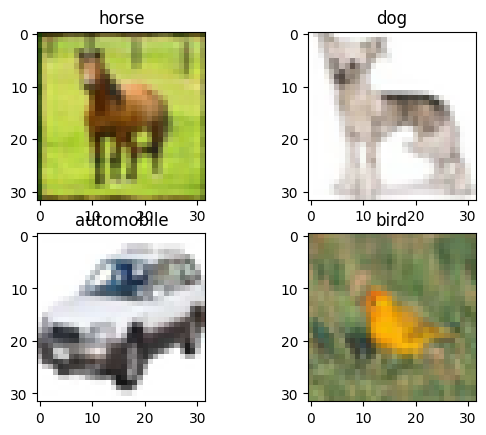

In [37]:
def print_images(n):
    f,axarr = plt.subplots(n,n)
    for i in range(n):
        for j in range(n):
            x = random.randrange(len(Y_train))
            axarr[i,j].imshow(X_train[x])
            axarr[i,j].set_title(number_to_name(Y_train[x][0]))
print_images(2)

In [38]:
X_train,Y_train = shuffle(X_train,Y_train)
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [41]:
inputs = tf.keras.layers.Input((32,32,3))
s = tf.keras.layers.Lambda(lambda x:x/255.0)(inputs)
c1 = tf.keras.layers.Conv2D(8,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(s)
c1 = tf.keras.layers.Conv2D(8,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c1)


# Layer 2

# In[8]:


c2 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.2)(c2)
c2 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c2)


# Layer 3

# In[9]:


c3 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
p3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c3)


# Layer 4

# In[10]:


c4 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c4)



c5 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)

c6 = tf.keras.layers.Conv2D(10,(1,1),activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01))(c5)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c7 = tf.keras.layers.Flatten()(c6)
c8 = tf.keras.layers.Dense(128, activation='relu')(c7)
c8 = tf.keras.layers.Dropout(0.3)(c8)
outputs = tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.L2(0.01),activation = 'softmax')(c8)


# In[17]:


model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


# Model Checkpoint



callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=20,verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir='logs'),
            tf.keras.callbacks.ModelCheckpoint('CIFAR10_classification.h5',verbose=1,save_best_only=True)]


# In[ ]:


results = model.fit(X_train,Y_train,validation_split=0.25,batch_size=64,epochs=100,callbacks=callbacks)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda_6 (Lambda)           (None, 32, 32, 3)         0         
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_66 (Conv2D)          (None, 32, 32, 8)         584       
                                                                 
 batch_normalization_30 (Bat  (None, 32, 32, 8)        32        
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 8)        0         
 g2D)                                                      

2023-11-05 19:47:00.050769: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_6/dropout_35/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


585/586 [============================>.] - ETA: 0s - loss: 2.1080 - accuracy: 0.2727
Epoch 1: val_loss improved from inf to 2.05944, saving model to CIFAR10_classification.h5
586/586 [==============================] - 12s 10ms/step - loss: 2.1077 - accuracy: 0.2729 - val_loss: 2.0594 - val_accuracy: 0.2533
Epoch 2/100
582/586 [============================>.] - ETA: 0s - loss: 1.6487 - accuracy: 0.4104
Epoch 2: val_loss improved from 2.05944 to 1.39630, saving model to CIFAR10_classification.h5
586/586 [==============================] - 5s 9ms/step - loss: 1.6477 - accuracy: 0.4107 - val_loss: 1.3963 - val_accuracy: 0.5074
Epoch 3/100
584/586 [============================>.] - ETA: 0s - loss: 1.4816 - accuracy: 0.4842
Epoch 3: val_loss did not improve from 1.39630
586/586 [==============================] - 5s 9ms/step - loss: 1.4820 - accuracy: 0.4840 - val_loss: 1.4237 - val_accuracy: 0.4972
Epoch 4/100
584/586 [============================>.] - ETA: 0s - loss: 1.3707 - accuracy: 0.530

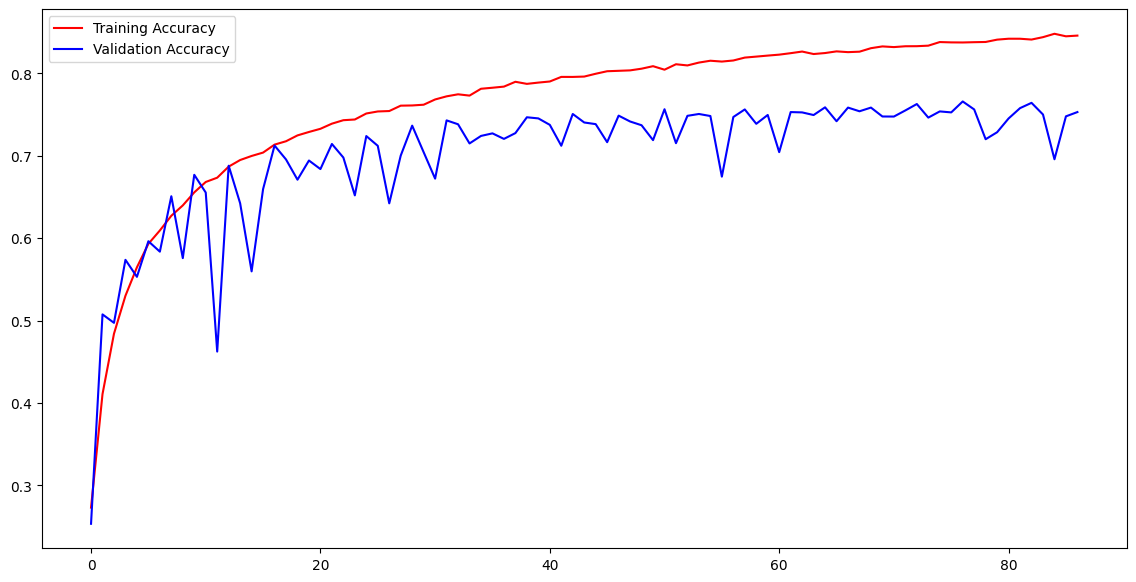

In [43]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

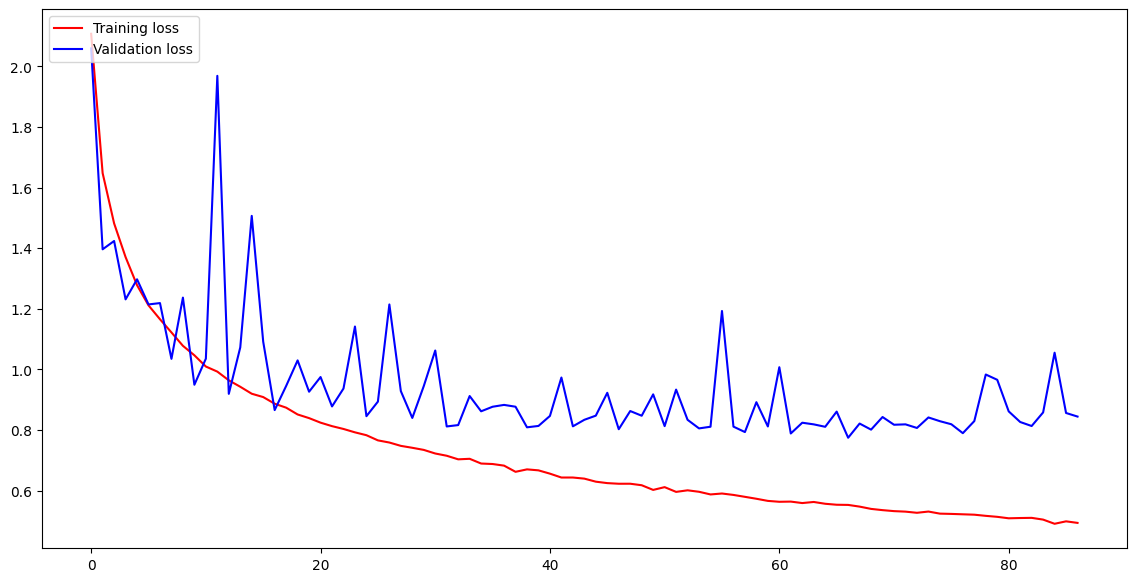

In [44]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

1/1 [==============================] - 0s 19ms/step


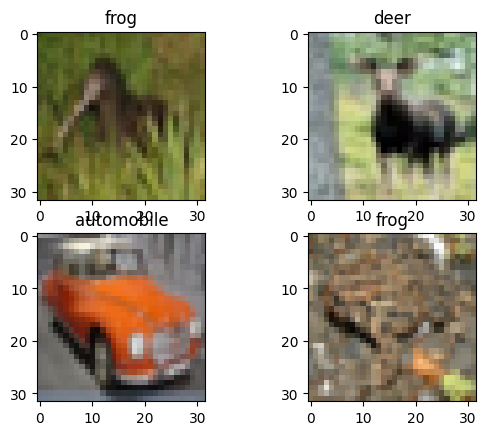

In [56]:
def prediction(n):
    f,axarr = plt.subplots(n,n)
    for i in range(n):
        for j in range(n):
            img = X_test[random.randrange(len(Y_test))]
            axarr[i,j].imshow(img)
            img1 = img.reshape(1,32,32,3)
            y_pred_vals = model.predict(img1)
            y_pred = y_pred_vals.argmax()
            y_pred_name = label_name[y_pred]
            axarr[i,j].set_title(y_pred_name)

prediction(2)